In [186]:
import os
import tensorflow as tf
import numpy as np
import importlib
import pandas as pd

from POD_Lib import path_handling as ph
from POD_Lib import Calculation as calc
from POD_Lib import utils
from POD_Lib import models

from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [46]:
file_dir = os.path.join(ph.get_raw_data(),'M_0.6')
file= os.path.join(file_dir, 'M_0.6_VF_0.4.csv')
y_true = pd.read_csv(file, usecols=['CD']).to_numpy()

In [4]:
import importlib as imp

imp.reload(models)
imp.reload(utils)

<module 'POD_Lib.utils' from 'C:\\Users\\User\\Desktop\\Jupyter\\TA\\Proper-Orthogonal-Decomposition\\POD_Lib\\utils.py'>

In [5]:
import matplotlib.pyplot as plt 


sol_mat = calc.sol_matrix(names='CD')
mach_vf_array = utils.get_mach_vf_array()
U,s,V = calc.perform_SVD()
k = calc.calc_K(s)
U_hat = calc.calc_U_hat(U,k)
delta_hat = calc.calc_delta_hat(U_hat)
# history, evall = models.training(mach_vf_array, delta_hat, k)
# plt.plot(history.history['loss'])

In [6]:
MinMax = MinMaxScaler()
StdScale = StandardScaler()

In [9]:
X = mach_vf_array
y = delta_hat
X_scaled = StdScale.fit_transform(X)
y_scaled = StdScale.fit_transform(y)

## STD Scaled

In [30]:
y_scaled.shape

(11, 57)

In [32]:
X_scaled.shape

(57, 2)

In [36]:
def forecast(model,u_hat, mach, vf, y_scaled):
    delta_star = models.predict_delta_star(model, mach= mach, vf=vf).T
    delta_star = np.squeeze(delta_star)
    y_scaled[:,0] = delta_star
    y_new = StdScale.inverse_transform(y_scaled)
    delta_star = y_new[:,0]
    output = calc.prediction(delta_star, u_hat)
    
    return output

In [114]:
tf.keras.backend.clear_session()
model1= Sequential([
        Dense(500, activation='relu'),
        Dense(600, activation='relu'),
        Dense(300, activation='relu'),
        Dense(100, activation='relu'),
        Dense(11)])
model1.compile(loss= 'mse',
              optimizer='adam',
               metrics=['mae']
              )

history1 = model1.fit(X,y.T, epochs=500, shuffle=False)
model1.summary()

Epoch 1/500
2/2 [==============================] - 1s 20ms/step - loss: 0.0260 - mae: 0.0545
Epoch 2/500
2/2 [==============================] - 0s 18ms/step - loss: 0.0259 - mae: 0.0611
Epoch 3/500
2/2 [==============================] - 0s 29ms/step - loss: 0.0246 - mae: 0.0527
Epoch 4/500
2/2 [==============================] - 0s 22ms/step - loss: 0.0245 - mae: 0.0537
Epoch 5/500
2/2 [==============================] - 0s 27ms/step - loss: 0.0245 - mae: 0.0525
Epoch 6/500
2/2 [==============================] - 0s 16ms/step - loss: 0.0244 - mae: 0.0524
Epoch 7/500
2/2 [==============================] - 0s 16ms/step - loss: 0.0242 - mae: 0.0484
Epoch 8/500
2/2 [==============================] - 0s 24ms/step - loss: 0.0241 - mae: 0.0473
Epoch 9/500
2/2 [==============================] - 0s 27ms/step - loss: 0.0240 - mae: 0.0470
Epoch 10/500
2/2 [==============================] - 0s 21ms/step - loss: 0.0239 - mae: 0.0471
Epoch 11/500
2/2 [==============================] - 0s 22ms/step - lo

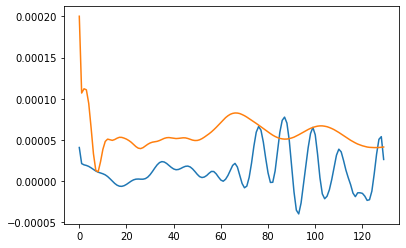

In [115]:
output1 = forecast(model1,U_hat, mach=0.6, vf=0.4, y_scaled=y_scaled)
plt.plot(output1)
plt.plot(y_true)

In [58]:
y_true.shape

(130, 1)

In [59]:
y_pred= np.expand_dims(output1, axis=1)
y_pred.shape

(130, 1)

In [60]:
mse = tf.keras.metrics.mean_squared_error(
    y_true, y_pred
)
np.mean(mse)

2.764888796502038e-09

## MinMax Scale

In [116]:
Xm_scaled = MinMax.fit_transform(X)
ym_scaled = MinMax.fit_transform(y)

In [123]:
ym_scaled.mean()

0.6985102763492197

In [124]:
def forecast(model,u_hat, mach, vf, y_scaled):
    delta_star = models.predict_delta_star(model, mach= mach, vf=vf).T
    delta_star = np.squeeze(delta_star)
    y_scaled[:,0] = delta_star
    y_new = MinMax.inverse_transform(y_scaled)
    delta_star = y_new[:,0]
    output = calc.prediction(delta_star, u_hat)
    
    return output

In [184]:
tf.keras.backend.clear_session()
model2= Sequential([
        Dense(600, activation='relu'),
        Dense(300, activation='relu'),
        Dense(200, activation='relu'),
        Dense(50, activation='relu'),
        Dense(11)])
# optimizer = tf.keras.optimizers.Adam(learning_rate=5e-4)
model2.compile(loss= 'mse',
              optimizer='adam',
               metrics=['mae']
              )

history2 = model2.fit(X,y.T, epochs=500, shuffle=False)
model2.summary()

Epoch 1/500
2/2 [==============================] - 1s 12ms/step - loss: 0.0294 - mae: 0.0613
Epoch 2/500
2/2 [==============================] - 0s 17ms/step - loss: 0.0253 - mae: 0.0412
Epoch 3/500
2/2 [==============================] - 0s 23ms/step - loss: 0.0247 - mae: 0.0490
Epoch 4/500
2/2 [==============================] - 0s 15ms/step - loss: 0.0245 - mae: 0.0519
Epoch 5/500
2/2 [==============================] - 0s 12ms/step - loss: 0.0245 - mae: 0.0525
Epoch 6/500
2/2 [==============================] - 0s 17ms/step - loss: 0.0245 - mae: 0.0519
Epoch 7/500
2/2 [==============================] - 0s 15ms/step - loss: 0.0243 - mae: 0.0503
Epoch 8/500
2/2 [==============================] - 0s 17ms/step - loss: 0.0242 - mae: 0.0503
Epoch 9/500
2/2 [==============================] - 0s 11ms/step - loss: 0.0241 - mae: 0.0505
Epoch 10/500
2/2 [==============================] - 0s 16ms/step - loss: 0.0241 - mae: 0.0506
Epoch 11/500
2/2 [==============================] - 0s 13ms/step - lo

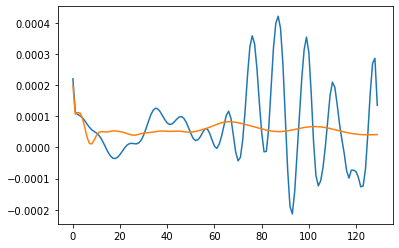

In [185]:
output2 = forecast(model2,U_hat, mach=0.6, vf=0.4, y_scaled=ym_scaled)
plt.plot(output2)
plt.plot(y_true)

## Other 

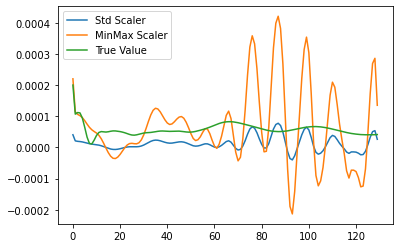

In [191]:
plt.plot(output1, label='Std Scaler')
plt.plot(output2, label='MinMax Scaler')
plt.plot(y_true, label='True Value')
plt.legend()